Importing libraries

In [5]:
import numpy as np  #accessing arrays
import pandas as pd #create,update,access dataframes
import matplotlib.pyplot as plt  #graphs,figure plotting
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split #to split the train and test dataset from the whole imported dataset
from sklearn.metrics import confusion_matrix #confusion matrix
#import itertools

import keras
from keras.models import Sequential #create a new model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization #importing all the tyes of layers that are to be added into the model
from tensorflow.keras.optimizers import RMSprop #optimization function (root mean square)
from tensorflow.keras.preprocessing.image import ImageDataGenerator #matrix to image
from keras.callbacks import ReduceLROnPlateau #learning rate (speed at which the optimization is performed)
#from keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.utils import to_categorical

Importing dataset

In [6]:
df1 = pd.read_csv('/Users/bhoomi/COMP_6771_Project_Try1/train.csv')  #training
df2 = pd.read_csv('/Users/bhoomi/COMP_6771_Project_Try1/test.csv')   #testing

In [7]:
df1

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y_train = df1["label"]                                    #labels (number)
X_train = df1.drop(labels = ["label"],axis = 1).values    #pixels

Converting pixel values into images

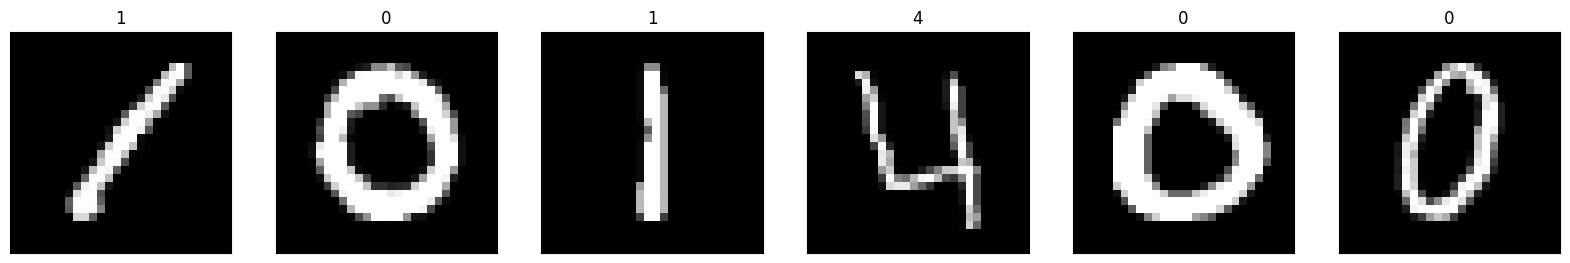

In [9]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28,28), cmap='gray')
    ax.set_title(str(Y_train[i]))

Visualizing input (0-255)

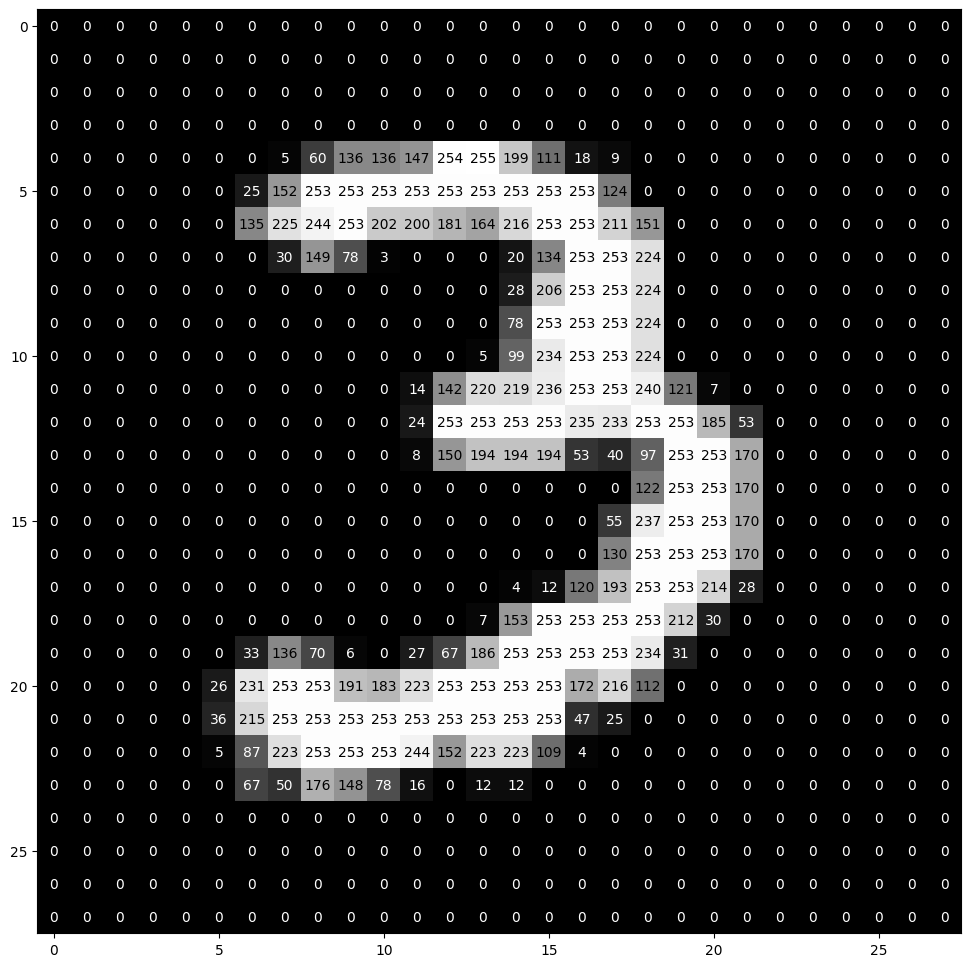

In [10]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[9].reshape(28,28), ax)

Normalizing the input

In [11]:
X_train = X_train/255.0
X_test = df2/255.0

reshaping normalized input

In [12]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

Converting output labels in binary form

In [13]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=7)  #training and validation sets

MODEL

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1))) #GRAYSCALE IMAGE
model.add(BatchNormalization())   #NORMALIZE THE CONVOLUTED FEATURE
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))  #CONVOLUTION LAYER
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))   #MAXPOOLING LAYER
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#cONVERTING THE CONVOLUTED FEATURE INTO NEURAL NETWORK
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
print(model)

<Sequential name=sequential, built=True>


TRAINING OF THE MODEL

In [17]:
epochs = 30  #DIVIDE THE DATASET INTO EPOCHS
batch_size = 64  #BATCH SIZE : NO . OF INPUTS USED IN ONE ITERATION

In [18]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [19]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [21]:
image_gen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=False,vertical_flip=False,fill_mode='nearest')

In [22]:
train_image_gen=image_gen.fit(X_train)

In [23]:
model.fit(image_gen.flow(X_train, Y_train, batch_size=batch_size), epochs=epochs, validation_data = (X_val, Y_val), callbacks = [learning_rate_reduction])

Epoch 1/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.9040 - loss: 0.3142 - val_accuracy: 0.9733 - val_loss: 0.0832 - learning_rate: 0.0010
Epoch 2/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.9681 - loss: 0.1063 - val_accuracy: 0.9874 - val_loss: 0.0431 - learning_rate: 0.0010
Epoch 3/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.9764 - loss: 0.0789 - val_accuracy: 0.9898 - val_loss: 0.0370 - learning_rate: 0.0010
Epoch 4/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 35s 60ms/step - accuracy: 0.9808 - loss: 0.0671 - val_accuracy: 0.9857 - val_loss: 0.0530 - learning_rate: 0.0010
Epoch 5/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9818 - loss: 0.0616
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
591/591 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.9829 - loss: 0.0587 - val_accuracy: 0.9857 - val_loss: 0.0505 - learning_rate: 0.0010
Epoch 6/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.9877 - los

In [25]:
metrics=pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.904021,0.314176,0.973333,0.083226,0.001000
1,0.968148,0.106335,0.987381,0.043136,0.001000
2,0.976376,0.078901,0.989762,0.036985,0.001000
3,0.980820,0.067052,0.985714,0.052978,0.001000
4,0.982910,0.058657,0.985714,0.050458,0.001000
5,0.987672,0.043072,0.993333,0.022779,0.000500
6,0.988069,0.040420,0.993095,0.026744,0.000500
7,0.989841,0.034574,0.993095,0.028830,0.000500
8,0.991402,0.028586,0.994048,0.022960,0.000250
9,0.991640,0.028193,0.994286,0.022616,0.000250


In [26]:
model.save("digit_cnn.keras")

In [27]:

import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import cv2

def preprocess_mnist_style(img_path, invert=True, show=False):
    # Load image
    img = Image.open(img_path).convert('L')
    img = np.array(img)

    # Invert if needed
    if invert:
        img = 255 - img

    # Threshold to isolate digit
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Find bounding box of the digit
    coords = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(coords)
    digit = img[y:y+h, x:x+w]

    # Resize longest side to 20 pixels (MNIST style)
    if h > w:
        new_h = 20
        new_w = int(w * (20/h))
    else:
        new_w = 20
        new_h = int(h * (20/w))

    digit = cv2.resize(digit, (new_w, new_h))

    # Pad to 28x28
    pad_top = (28 - new_h) // 2
    pad_bottom = 28 - new_h - pad_top
    pad_left = (28 - new_w) // 2
    pad_right = 28 - new_w - pad_left

    digit = np.pad(digit, ((pad_top, pad_bottom), (pad_left, pad_right)), 'constant', constant_values=0)

    # Normalize
    digit = digit.astype('float32')/255.0

    if show:
        plt.imshow(digit, cmap='gray')
        plt.title("Preprocessed Image")
        plt.axis('off')
        plt.show()

    return digit.reshape(1,28,28,1)

def predict_digit(img_path, model_path="digit_cnn.keras", invert=True, show=False):
    model = load_model(model_path)
    digit = preprocess_mnist_style(img_path, invert=invert, show=show)
    preds = model.predict(digit, verbose=0)
    return np.argmax(preds)


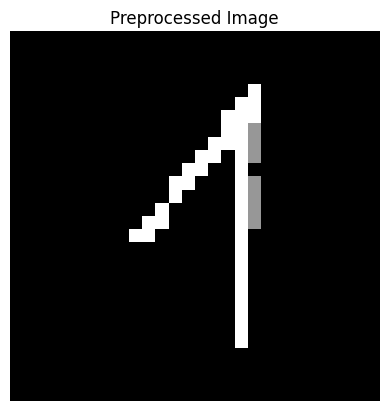

Predicted digit: 1


In [35]:
digit = predict_digit("/Users/bhoomi/Documents/COMP 6771/Project/one.jpg",
                      model_path="digit_cnn.keras",
                      invert=True,
                      show=True)

print("Predicted digit:", digit)

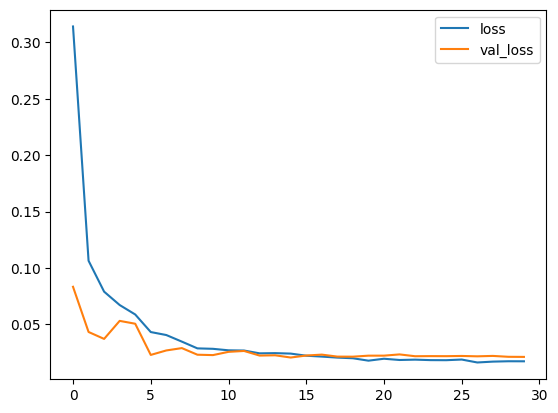

In [29]:
metrics[['loss' , 'val_loss']].plot()
plt.show()

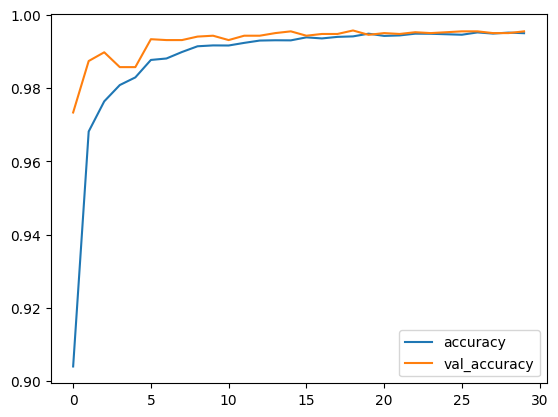

In [30]:
metrics[['accuracy' , 'val_accuracy']].plot()
plt.show()

Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[7]


<function matplotlib.pyplot.show(close=None, block=None)>

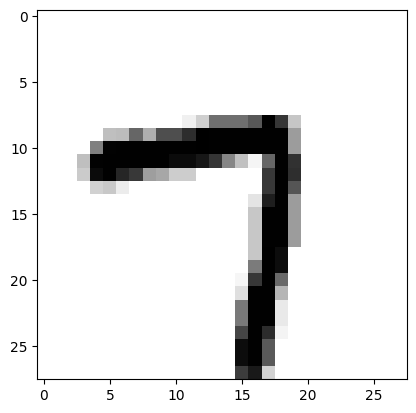

In [31]:
np.random.seed(16)
random_selection=np.random.randint(0,4201,size=1)
random_sample=X_val[random_selection]
print('Prediction:')

print(np.argmax(model.predict(random_sample.reshape(1,28,28,1)),axis=1))
plt.imshow(random_sample.reshape(28,28),cmap='binary')
plt.show

Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[3]


<function matplotlib.pyplot.show(close=None, block=None)>

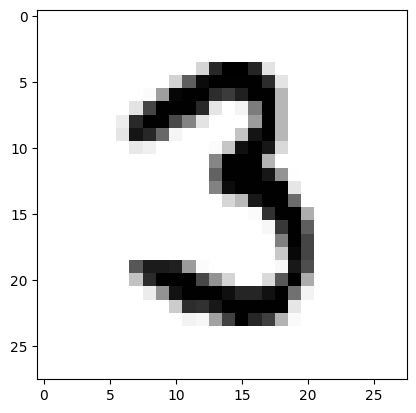

In [32]:
np.random.seed(9)
random_selection=np.random.randint(0,4201,size=1)
random_sample=X_val[random_selection]
print('Prediction:')
print(np.argmax(model.predict(random_sample.reshape(1,28,28,1)),axis=1))
plt.imshow(random_sample.reshape(28,28),cmap='binary')
plt.show